# Software Coaching for Python
# Week 6: Project Presentation

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/SW_Coaching_for_Python"
my_folder = "ESK"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"
classdata_folder = f"{path}/classdata"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Executive Summary

#Name


강은수

### Target Web Site

ComputerWeekly.com: https://www.computerweekly.com/

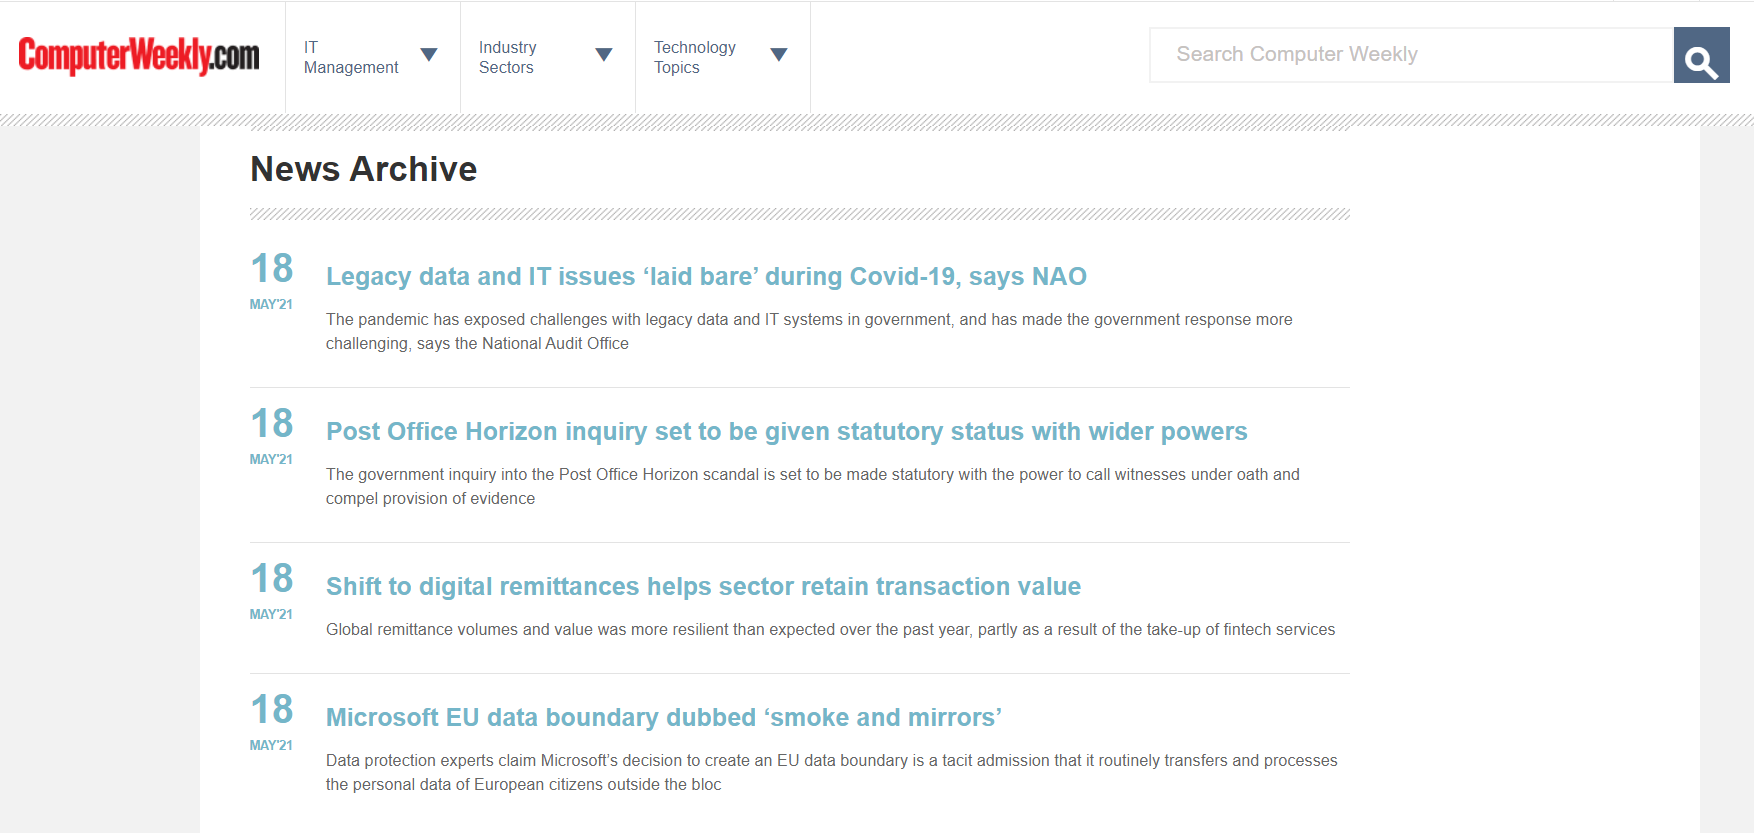

In [2]:
from IPython.display import Image
Image(f"{outcome_folder}/what_is_computerweekly.PNG")

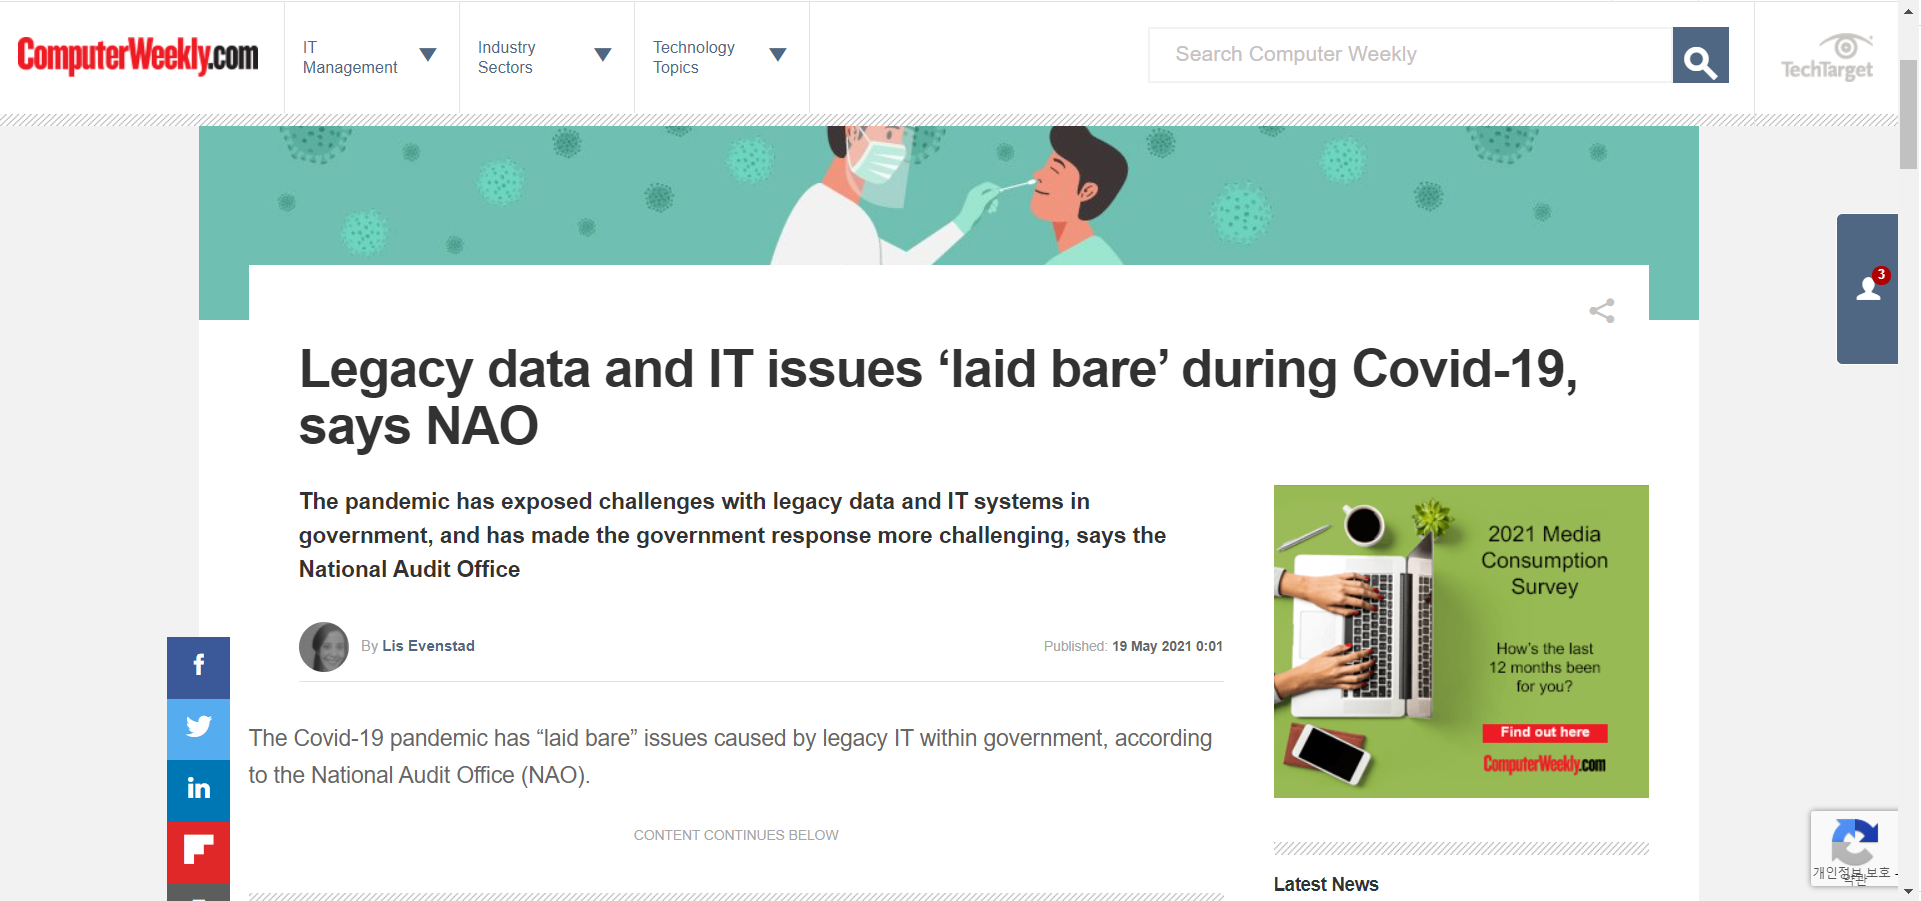

In [3]:
from IPython.display import Image
Image(f"{outcome_folder}/specific_website.PNG")

### Reasons Why I Chose the Web Site

ComputerWeekly.com은 영국의 IT 전문가를 위한 디지털 잡지이자 웹사이트임. IT 뉴스들을 분석하여 활발히 언급되는 다양한 분야에 어떤 IT 주제가 있는지 확인해보고 싶었음. 이에 4년치에 해당하는 많은 기사들을 수집해 다양한 텍스트 분석을 해보고자 하였음.   

### Total Number of Web Articles Collected

9,988 건

### Data Time Range

2017-09-12 - 2021-05-07 (약 4년)

### Key Findings and Lessons

- IT 전문가들을 위한 사이트답게 IT 관련 기사들이 대부분이었음. 해당 매거진이 주로 다루는 분야는 DATA/5G/보안/AI였음.
- 영국의 사이트이므로 gdpr(EU의 개인정보보호 법령), brexit(영국의 유럽 연합 탈퇴)과 같은 영국 관련 이슈도 확인할 수 있었음.

### Major Challenges


- 대부분 사실에 근거한 객관적인 기사들이므로 본문에 주로 사용된 단어들이 stopword로 정의하긴 애매하여 몇 가지 분석은 기사의 본문뿐만 아니라 제목들도 활용하였습니다.

### Future Work



- 코로나 이전의 17,18,19년도 기사들도 있으므로 Time Series 분석을 통해 실제 코로나가 IT 분야에 어떠한 영향을 끼쳤는지 확인하는 작업이 의미있을 것이라 생각됨.
- 주로 나온 Keyword가 IT 분야의 전문 용어보다는 일반 기사에서 자주 쓰이는 general한 단어가 많았음. Stopword로 정의하기엔 애매하여 제외하진 않았지만 시간이 걸리더라도 이런 모든 단어들을 제외해보는 것도 좋은 시도일 것이라 판단함.
- 영국의 사이트이므로 영국과 관련된 단어들이 여럿 나왔는데 실제로 영국을 위주로 다루는 것인지 전세계를 다루는 것인지에 대한 비율이 궁금함.


## Installing Necessary Packages

In [4]:
! pip install --user nltk scikit-learn pyldavis textblob

     |████████████████████████████████| 1.7MB 26.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 23.3MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=be30c697d90228f90c7bdc548857f99dc4c002c4cf2304d6f792316681cf8bc2
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyldavis
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.


## Loading Data

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv('{}/{}/{}'.format(path, my_folder ,'project/elements_50/csv_file/final_9988.csv'), sep = '\t')
df = df.dropna(subset=["title", "text"], axis=0)
df

,title,url,desc,html_name,text,author,author_field,date
0,"Ericsson, Telarus team to take 5G-ready virtual workspace to small businesses",https://www.computerweekly.com/news/252500329/Ericsson-Telarus-team-to-take-5G-ready-virtual-workspace-to-small-businesses,"5G-ready virtual desktop subscription service will cover business applications, compute, storage and security needs for small and medium-sized bus...",Ericsson-Telarus-team-to-take-5G-ready-virtual-workspace-to-small-businesses.html,Ericsson has launched a 5G-ready virtual workspace service designed to address the future needs of small and medium-sized enterprises (SMEs).Thoug...,Joe O’Halloran,Computer Weekly,2021-05-07 10:00:00
1,"Ransomware, supply chain attacks show no sign of abating",https://www.computerweekly.com/news/252500389/Ransomware-supply-chain-attacks-show-no-sign-of-abating,"Security experts at Black Hat Asia 2021 discuss the state of ransomware and supply chain attacks, two of the most common attack vectors that offer...",Ransomware-supply-chain-attacks-show-no-sign-of-abating.html,Ransomware and supply chain attacks will continue to rear their ugly head in a world where cyber attacks are increasingly being politicised.Nearly...,Aaron Tan,TechTarget,2021-05-07 07:47:00
2,Government urged to add scam protections to Online Safety Bill,https://www.computerweekly.com/news/252500312/Government-urged-to-add-scam-protections-to-Online-Safety-Bill,Group of organisations calls for the government to use the Online Safety Bill to protect people from cyber scams,Government-urged-to-add-scam-protections-to-Online-Safety-Bill.html,"A coalition of organisations representing consumers, civil society and business is urging the government to include protections from online cyber ...",Alex Scroxton,Security Editor,2021-05-07 00:01:00
3,Tech startups turn to digital PR platform for media exposure,https://www.computerweekly.com/news/252500327/Tech-startups-turn-to-digital-PR-platform-for-media-exposure,Digital PR platform Newspage helps early-stage tech startups with limited resources increase their visibility to journalists and news organisations,Tech-startups-turn-to-digital-PR-platform-for-media-exposure.html,Early-stage technology startups in the UK are using digital public relations (PR) platform Newspage to help increase media visibility and secure f...,Sebastian Klovig Skelton,Senior reporter,2021-05-06 17:45:00
4,Nokia unveils Smart Node for premium 5G mobile indoor coverage,https://www.computerweekly.com/news/252500320/Nokia-unveils-Smart-Node-for-premium-5G-mobile-indoor-coverage,"Nokia rolls out ‘all-in-one solution’ for delivering high-quality 4G and 5G indoor mobile coverage, and is selected to provide technical, maintena...",Nokia-unveils-Smart-Node-for-premium-5G-mobile-indoor-coverage.html,"With the new world of work blurring the borders between the office and home environment, and use cases and applications evolving accordingly, Noki...",Joe O’Halloran,Computer Weekly,2021-05-06 17:15:00
...,...,...,...,...,...,...,...,...
9983,Vodafone whitepaper hails role of IoT in delivering personalised healthcare treatments,https://www.computerweekly.com/news/450426169/Vodafone-whitepaper-hails-role-of-IoT-in-delivering-personalised-healthcare-treatments,Vodafone outlines how smart devices can improve patient adherence by offering them personalised healthcare,Vodafone-whitepaper-hails-role-of-IoT-in-delivering-personalised-healthcare-treatments.html,"Internet of things (IoT) devices could provide patients suffering with long-term illnesses with access to more personalised treatment, a Vodafone ...",Zach Emmanuel,Computer Weekly,2017-09-13 10:00:00
9984,CBI calls for transitional deal with EU on data,https://www.computerweekly.com/news/450426215/CBI-calls-for-transitional-deal-with-EU-on-data,The CBI is warning of the risks to UK businesses of no deal with the European Union on data exchange when Brexit arrives,CBI-calls-for-transitional-deal-with-EU-on-data.html,The C

(*** 각 컬럼에 대한 설명!)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9987
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         9988 non-null   object
 1   url           9988 non-null   object
 2   desc          9988 non-null   object
 3   html_name     9988 non-null   object
 4   text          9988 non-null   object
 5   author        9988 non-null   object
 6   author_field  8336 non-null   object
 7   date          9988 non-null   object
dtypes: object(8)
memory usage: 702.3+ KB


In [7]:
df.head(10)

,title,url,desc,html_name,text,author,author_field,date
0,"Ericsson, Telarus team to take 5G-ready virtual workspace to small businesses",https://www.computerweekly.com/news/252500329/Ericsson-Telarus-team-to-take-5G-ready-virtual-workspace-to-small-businesses,"5G-ready virtual desktop subscription service will cover business applications, compute, storage and security needs for small and medium-sized bus...",Ericsson-Telarus-team-to-take-5G-ready-virtual-workspace-to-small-businesses.html,Ericsson has launched a 5G-ready virtual workspace service designed to address the future needs of small and medium-sized enterprises (SMEs).Thoug...,Joe O’Halloran,Computer Weekly,2021-05-07 10:00:00
1,"Ransomware, supply chain attacks show no sign of abating",https://www.computerweekly.com/news/252500389/Ransomware-supply-chain-attacks-show-no-sign-of-abating,"Security experts at Black Hat Asia 2021 discuss the state of ransomware and supply chain attacks, two of the most common attack vectors that offer...",Ransomware-supply-chain-attacks-show-no-sign-of-abating.html,Ransomware and supply chain attacks will continue to rear their ugly head in a world where cyber attacks are increasingly being politicised.Nearly...,Aaron Tan,TechTarget,2021-05-07 07:47:00
2,Government urged to add scam protections to Online Safety Bill,https://www.computerweekly.com/news/252500312/Government-urged-to-add-scam-protections-to-Online-Safety-Bill,Group of organisations calls for the government to use the Online Safety Bill to protect people from cyber scams,Government-urged-to-add-scam-protections-to-Online-Safety-Bill.html,"A coalition of organisations representing consumers, civil society and business is urging the government to include protections from online cyber ...",Alex Scroxton,Security Editor,2021-05-07 00:01:00
3,Tech startups turn to digital PR platform for media exposure,https://www.computerweekly.com/news/252500327/Tech-startups-turn-to-digital-PR-platform-for-media-exposure,Digital PR platform Newspage helps early-stage tech startups with limited resources increase their visibility to journalists and news organisations,Tech-startups-turn-to-digital-PR-platform-for-media-exposure.html,Early-stage technology startups in the UK are using digital public relations (PR) platform Newspage to help increase media visibility and secure f...,Sebastian Klovig Skelton,Senior reporter,2021-05-06 17:45:00
4,Nokia unveils Smart Node for premium 5G mobile indoor coverage,https://www.computerweekly.com/news/252500320/Nokia-unveils-Smart-Node-for-premium-5G-mobile-indoor-coverage,"Nokia rolls out ‘all-in-one solution’ for delivering high-quality 4G and 5G indoor mobile coverage, and is selected to provide technical, maintena...",Nokia-unveils-Smart-Node-for-premium-5G-mobile-indoor-coverage.html,"With the new world of work blurring the borders between the office and home environment, and use cases and applications evolving accordingly, Noki...",Joe O’Halloran,Computer Weekly,2021-05-06 17:15:00
5,Scammers accidentally reveal fake Amazon review data,https://www.computerweekly.com/news/252500326/Scammers-accidentally-reveal-fake-Amazon-review-data,"More than 13 million records relating to an organised fake review scam have been found on an unsecured ElasticSearch database, implicating hundred...",Scammers-accidentally-reveal-fake-Amazon-review-data.html,"An opsec-illiterate scammer has accidentally exposed more than 13 million data records via an open ElasticSearch database, relating to a large-sca...",Alex Scroxton,Security Editor,2021-05-06 15:57:00
6,Google to introduce mandatory MFA for users,https://www.computerweekly.com/news/252500323/Google-to-introduce-mandatory-MFA-for-users,"In future, holders of Google accounts will have no option but to use multifactor authentication if they want to use the firm’s services",Google-to-introduce-mandatory-MFA-for-users.html,Google plans to make multifactor authentication (MFA) compulsory for Google account holders to bett

In [8]:
df.tail(10)

,title,url,desc,html_name,text,author,author_field,date
9978,DevOps salary survey highlights link between server farm size and practitioner pay,https://www.computerweekly.com/news/450426227/DevOps-salary-survey-highlights-link-between-server-farm-size-and-practitioner-pay,"The Puppet 2017 DevOps Salary Report suggests practitioners working at larger firms, with sizeable server farms and low-level manual configuration...",DevOps-salary-survey-highlights-link-between-server-farm-size-and-practitioner-pay.html,"DevOps practitioners working for organisations running 500 or more servers are more likely to be paid in excess of $100,000 a year for the work th...",Caroline Donnelly,"Senior Editor, UK",2017-09-13 15:15:00
9979,"CIO interview: Karl Hoods, CIO, Save the Children UK",https://www.computerweekly.com/news/450426139/CIO-interview-Karl-Hoods-CIO-Save-the-Children-UK,The charity’s CIO is looking at the potential of blockchain technologies and establishing an internal digital academy to drive its digital transfo...,CIO-interview-Karl-Hoods-CIO-Save-the-Children-UK.html,Save the Children UK is driving a digital transformation strategy and innovation initiatives to get closer to its supporters and bringing operatio...,Angelica Mari,NaN,2017-09-13 15:00:00
9980,Finland’s Valmet transforms IT with €38m outsourcing deal,https://www.computerweekly.com/news/450426236/Finlands-Valmet-transforms-IT-with-38m-outsourcing-deal,Industrial tech firm Valmet outsources IT infrastructure services to focus its internal IT resources on business and digital developments,Finlands-Valmet-transforms-IT-with-38m-outsourcing-deal.html,Finnish industrial technology company Valmet is shifting its in-house IT focus to business and digital development following a major IT outsourcin...,Eeva Haaramo,NaN,2017-09-13 14:41:00
9981,Self-preservation: The Gibraltar National Archives uses cloud to safeguard its history,https://www.computerweekly.com/news/450426166/Self-preservation-The-Gibraltar-National-Archives-uses-cloud-to-safeguard-its-history,The head of the Gibraltar National Archives discusses how cloud and archiving technologies are safe-guarding its history for future generations,Self-preservation-The-Gibraltar-National-Archives-uses-cloud-to-safeguard-its-history.html,"Retaining corporate data for many years after it was created is a concept many enterprises are familiar with, and is an essential part of ensuring...",Caroline Donnelly,"Senior Editor, UK",2017-09-13 12:15:00
9982,Vodafone identifies 50 future digital hubs,https://www.computerweekly.com/news/450426219/Vodafone-identifies-50-future-digital-hubs,A Vodafone research report has identified a number of towns and cities that have the potential to become what it refers to as Digital Super Towns,Vodafone-identifies-50-future-digital-hubs.html,"More than 50 towns and cities around the country have untapped digital potential, and are well-placed to become future digital hubs and economic p...",Alex Scroxton,Security Editor,2017-09-13 10:45:00
9983,Vodafone whitepaper hails role of IoT in delivering personalised healthcare treatments,https://www.computerweekly.com/news/450426169/Vodafone-whitepaper-hails-role-of-IoT-in-delivering-personalised-healthcare-treatments,Vodafone outlines how smart devices can improve patient adherence by offering them personalised healthcare,Vodafone-whitepaper-hails-role-of-IoT-in-delivering-personalised-healthcare-treatments.html,"Internet of things (IoT) devices could provide patients suffering with long-term illnesses with access to more personalised treatment, a Vodafone ...",Zach Emmanuel,Computer Weekly,2017-09-13 10:00:00
9984,CBI calls for transitional deal with EU on data,https://www.computerweekly.com/news/450426215/CBI-calls-for-transitional-deal-with-EU-on-data,The CBI is warning of the risks to UK businesses of no deal with the European Union on data exchange when Brexit arrives,CBI-calls-for-transitional-deal-with-EU-on-data.html,The Confederation of British

## Popular Keywords Ranking

In [12]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

df["words"] = df.text.apply(lambda x: nltk.word_tokenize(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df["title_words"] = df.title.apply(lambda x: nltk.word_tokenize(x))
df["title_tagged_words"] = df.title_words.apply(lambda x: nltk.pos_tag(x))

In [11]:
df

,title,url,desc,html_name,text,author,author_field,date,words,tagged_words,title_words,title_tagged_words
0,"Ericsson, Telarus team to take 5G-ready virtual workspace to small businesses",https://www.computerweekly.com/news/252500329/Ericsson-Telarus-team-to-take-5G-ready-virtual-workspace-to-small-businesses,"5G-ready virtual desktop subscription service will cover business applications, compute, storage and security needs for small and medium-sized bus...",Ericsson-Telarus-team-to-take-5G-ready-virtual-workspace-to-small-businesses.html,Ericsson has launched a 5G-ready virtual workspace service designed to address the future needs of small and medium-sized enterprises (SMEs).Thoug...,Joe O’Halloran,Computer Weekly,2021-05-07 10:00:00,"[Ericsson, has, launched, a, 5G-ready, virtual, workspace, service, designed, to, address, the, future, needs, of, small, and, medium-sized, enter...","[(Ericsson, NNP), (has, VBZ), (launched, VBN), (a, DT), (5G-ready, JJ), (virtual, JJ), (workspace, NN), (service, NN), (designed, VBN), (to, TO), ...","[Ericsson, ,, Telarus, team, to, take, 5G-ready, virtual, workspace, to, small, businesses]","[(Ericsson, NNP), (,, ,), (Telarus, NNP), (team, NN), (to, TO), (take, VB), (5G-ready, JJ), (virtual, JJ), (workspace, NN), (to, TO), (small, JJ),..."
1,"Ransomware, supply chain attacks show no sign of abating",https://www.computerweekly.com/news/252500389/Ransomware-supply-chain-attacks-show-no-sign-of-abating,"Security experts at Black Hat Asia 2021 discuss the state of ransomware and supply chain attacks, two of the most common attack vectors that offer...",Ransomware-supply-chain-attacks-show-no-sign-of-abating.html,Ransomware and supply chain attacks will continue to rear their ugly head in a world where cyber attacks are increasingly being politicised.Nearly...,Aaron Tan,TechTarget,2021-05-07 07:47:00,"[Ransomware, and, supply, chain, attacks, will, continue, to, rear, their, ugly, head, in, a, world, where, cyber, attacks, are, increasingly, bei...","[(Ransomware, NNP), (and, CC), (supply, NN), (chain, NN), (attacks, NNS), (will, MD), (continue, VB), (to, TO), (rear, VB), (their, PRP$), (ugly, ...","[Ransomware, ,, supply, chain, attacks, show, no, sign, of, abating]","[(Ransomware, NNP), (,, ,), (supply, NN), (chain, NN), (attacks, NNS), (show, VBP), (no, DT), (sign, NN), (of, IN), (abating, VBG)]"
2,Government urged to add scam protections to Online Safety Bill,https://www.computerweekly.com/news/252500312/Government-urged-to-add-scam-protections-to-Online-Safety-Bill,Group of organisations calls for the government to use the Online Safety Bill to protect people from cyber scams,Government-urged-to-add-scam-protections-to-Online-Safety-Bill.html,"A coalition of organisations representing consumers, civil society and business is urging the government to include protections from online cyber ...",Alex Scroxton,Security Editor,2021-05-07 00:01:00,"[A, coalition, of, organisations, representing, consumers, ,, civil, society, and, business, is, urging, the, government, to, include, protections...","[(A, DT), (coalition, NN), (of, IN), (organisations, NNS), (representing, VBG), (consumers, NNS), (,, ,), (civil, JJ), (society, NN), (and, CC), (...","[Government, urged, to, add, scam, protections, to, Online, Safety, Bill]","[(Government, NN), (urged, VBD), (to, TO), (add, VB), (scam, JJ), (protections, NNS), (to, TO), (Online, NNP), (Safety, NNP), (Bill, NNP)]"
3,Tech startups turn to digital PR platform for media exposure,https://www.computerweekly.com/news/252500327/Tech-startups-turn-to-digital-PR-platform-for-media-exposure,Digital PR platform Newspage helps early-stage tech startups with limited resources increase their visibility to journalists and news organisations,Tech-startups-turn-to-digital-PR-platform-for-media-exposure.html,Early-stage technology startups in the UK are using digital public relations (PR) platform Newspage to help increase media visibility and secure f...,Sebastian Klovig

In [10]:
from collections import Counter

def get_counter(df_tagged_words, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in df_tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                ##########################################################
                # Check the tag
                ##########################################################
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)     # Be aware of the indentation!
        
    return counter

In [14]:
from nltk.corpus import stopwords
global_stopwords = nltk.corpus.stopwords.words("english") 

import string
local_stopwords = [c for c in string.punctuation] + ['‘', '’', '”', '“',  '—', '…', "could", "might", "would", "said", "also", "-", '–', "–"\
                                                     "use", "work", "one", "many", "used", "well", "using", "including", "year", "help", "us", "part", "take", "working",\
                                                     "according", "way", "years", "around", "number", "may", "needs", "even", "get", "added", "made", "already", "key", "based", "see", "able", \
                                                     "two", "provide", "make", "set", "still", "better", "says", "calls", "much", 'read', 'new', 'use']

### Overall Popular Keywords

In [14]:
counter_all = get_counter(df.tagged_words, global_stopwords+local_stopwords)
counter_all.most_common(50)

[('data', 6260),
 ('services', 5886),
 ('technology', 5877),
 ('business', 5193),
 ('need', 4962),
 ('across', 4887),
 ('digital', 4857),
 ('time', 4838),
 ('uk', 4637),
 ('people', 4606),
 ('service', 4600),
 ('companies', 4552),
 ('first', 4273),
 ('security', 4144),
 ('support', 4074),
 ('access', 4027),
 ('company', 3989),
 ('organisations', 3973),
 ('government', 3904),
 ('infrastructure', 3734),
 ('systems', 3512),
 ('information', 3508),
 ('public', 3497),
 ('customers', 3461),
 ('industry', 3154),
 ('businesses', 3151),
 ('network', 3141),
 ('users', 3120),
 ('research', 3105),
 ('world', 3072),
 ('software', 2964),
 ('future', 2953),
 ('system', 2945),
 ('cloud', 2932),
 ('sector', 2899),
 ('management', 2877),
 ('improve', 2835),
 ('like', 2834),
 ('global', 2833),
 ('risk', 2802),
 ('ensure', 2790),
 ('next', 2769),
 ('e-guide', 2756),
 ('top', 2755),
 ('important', 2745),
 ('products', 2738),
 ('technologies', 2693),
 ('report', 2686),
 ('cyber', 2683),
 ('platform', 2661)]

In [15]:
counter_title = get_counter(df.title_tagged_words, global_stopwords+local_stopwords)
counter_title.most_common(50)

[('uk', 894),
 ('data', 685),
 ('cloud', 676),
 ('security', 669),
 ('cyber', 642),
 ('digital', 627),
 ('government', 580),
 ('tech', 532),
 ('5g', 470),
 ('ai', 297),
 ('network', 256),
 ('business', 243),
 ('nhs', 243),
 ('interview', 226),
 ('coronavirus', 224),
 ('office', 220),
 ('services', 215),
 ('sector', 213),
 ('broadband', 212),
 ('launches', 211),
 ('technology', 207),
 ('covid-19', 206),
 ('top', 206),
 ('microsoft', 203),
 ('datacentre', 196),
 ('global', 193),
 ('firms', 191),
 ('2020', 188),
 ('google', 182),
 ('mobile', 179),
 ('first', 171),
 ('aws', 167),
 ('public', 164),
 ('open', 161),
 ('attacks', 158),
 ('cio', 155),
 ('2018', 154),
 ('10', 153),
 ('attack', 148),
 ('service', 146),
 ('2019', 146),
 ('bank', 140),
 ('enterprise', 138),
 ('industry', 133),
 ('report', 133),
 ('businesses', 131),
 ('risk', 130),
 ('support', 130),
 ('london', 130),
 ('market', 125)]

전체 워드들을 대상으로 한 키워드 랭킹은 stopword라기엔 애매한 단어들이 많았음. 따라서 제목을 대상으로 키워드 분석을 하였음. IT 분야 파악에는 훨씬 유의미한 결과를 보여줌. 영국의 IT 전문가들을 위한 사이트라서, UK 언급이 가장 많았고, DATA/클라우드/보안/5G/코로나 의 키워드가 상위권에 있고, 자주 언급된 기업으로는 AWS와 구글이 해당됨.

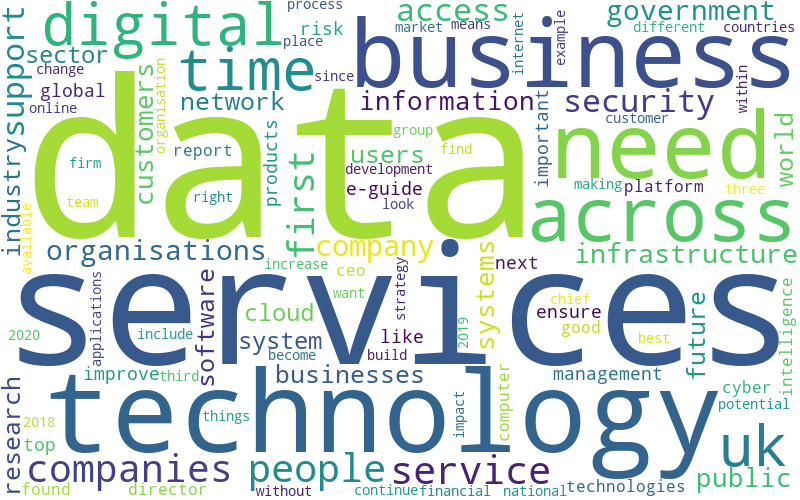

In [16]:
from IPython.display import Image
from wordcloud import WordCloud 

def draw_wordcloud(counter, image_file_name, max_words=100):
    wc = WordCloud(background_color="white", max_words=max_words, width=800, height=500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename=image_file_name))
    
draw_wordcloud(counter_all, f"{outcome_folder}/week6_wordcloud_all.png", 100)

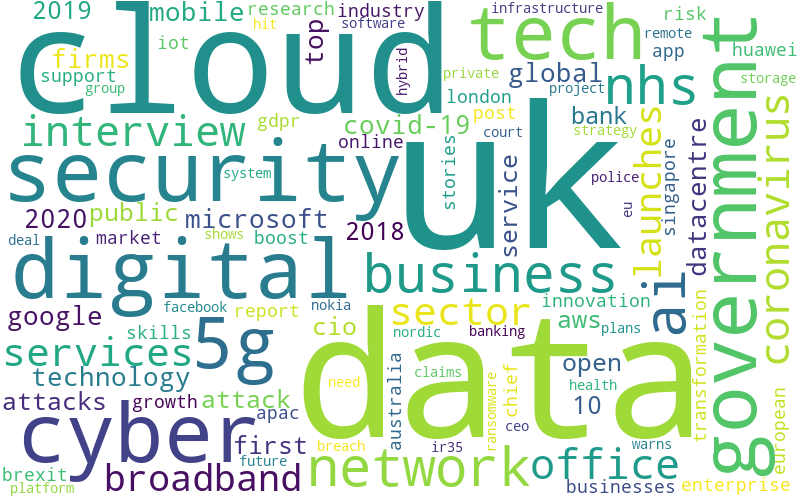

In [17]:
draw_wordcloud(counter_title, f"{outcome_folder}/week6_wordcloud_title.png", 100)

### Popular Nouns Representing Hot Topics

In [18]:
counter_nouns = get_counter(df.tagged_words, global_stopwords+local_stopwords, "NN")
counter_nouns.most_common(50)

[('data', 6242),
 ('services', 5886),
 ('technology', 5877),
 ('business', 5193),
 ('time', 4838),
 ('people', 4605),
 ('service', 4589),
 ('uk', 4586),
 ('companies', 4552),
 ('security', 4144),
 ('access', 4027),
 ('company', 3989),
 ('organisations', 3967),
 ('government', 3904),
 ('infrastructure', 3729),
 ('systems', 3512),
 ('information', 3508),
 ('customers', 3461),
 ('industry', 3154),
 ('businesses', 3150),
 ('network', 3141),
 ('users', 3118),
 ('research', 3104),
 ('world', 3072),
 ('software', 2964),
 ('system', 2945),
 ('sector', 2899),
 ('management', 2877),
 ('products', 2736),
 ('risk', 2725),
 ('cloud', 2693),
 ('technologies', 2687),
 ('director', 2653),
 ('platform', 2629),
 ('computer', 2629),
 ('intelligence', 2618),
 ('ceo', 2584),
 ('development', 2577),
 ('customer', 2533),
 ('market', 2519),
 ('organisation', 2489),
 ('report', 2455),
 ('firm', 2423),
 ('example', 2379),
 ('place', 2377),
 ('things', 2360),
 ('group', 2356),
 ('applications', 2301),
 ('team', 

In [19]:
counter_nouns_title = get_counter(df.title_tagged_words, global_stopwords+local_stopwords, "NN")
counter_nouns_title.most_common(50)

[('uk', 738),
 ('data', 675),
 ('security', 669),
 ('government', 578),
 ('cloud', 508),
 ('cyber', 437),
 ('tech', 393),
 ('ai', 293),
 ('network', 256),
 ('business', 243),
 ('nhs', 237),
 ('interview', 226),
 ('office', 217),
 ('services', 215),
 ('sector', 213),
 ('coronavirus', 208),
 ('technology', 207),
 ('microsoft', 201),
 ('broadband', 192),
 ('firms', 191),
 ('google', 181),
 ('aws', 162),
 ('cio', 155),
 ('covid-19', 153),
 ('attacks', 150),
 ('service', 146),
 ('digital', 144),
 ('bank', 140),
 ('datacentre', 139),
 ('industry', 133),
 ('attack', 132),
 ('businesses', 131),
 ('london', 130),
 ('risk', 127),
 ('market', 125),
 ('gdpr', 124),
 ('report', 123),
 ('innovation', 123),
 ('iot', 121),
 ('singapore', 120),
 ('enterprise', 119),
 ('research', 114),
 ('brexit', 114),
 ('transformation', 113),
 ('post', 113),
 ('skills', 113),
 ('growth', 112),
 ('australia', 111),
 ('apac', 109),
 ('huawei', 107)]

In [20]:
df.author_field.value_counts()

Security Editor                                               1410
Computer Weekly                                               1407
Senior analyst                                                1042
Emea Content Editor, Computer Weekly                           886
Managing Editor                                                825
Senior Editor, UK                                              764
TechTarget                                                     734
Business Editor                                                398
Senior reporter                                                286
Business Applications Editor                                   254
Storage Editor                                                 217
Editor in chief                                                 70
LeMagIT                                                         26
2QQ Ltd, Sussex University                                       3
Contino                                                       

명사들만을 대상으로 한 키워드 분석에서는 bussiness, service, company, industry, government, market, organisations, ceo 등과 같은 **비즈니스 관련 용어**들이 등장했고, 본문을 통해서는 IT 분야 동향을 파악하기 힘들어 제목을 분석하였음. 그 결과, **DATA/보안/클라우드/AI/코로나/IOT/구글/AWS/화웨이** 의 키워드들이 자주 언급되었음. 실제 author들의 분야를 보면, 보안 에디터, 비즈니스 데이터가 다수 있음을 파악할 수 있음. 영국 사이트로 영국을 나타내는 ***UK***, EU(유럽연합)의 개인정보보호 법령을 나타내는 ***gdpr***, 영국이 EU로부터 탈퇴한 ***brexit***의 키워드들이 등장함.

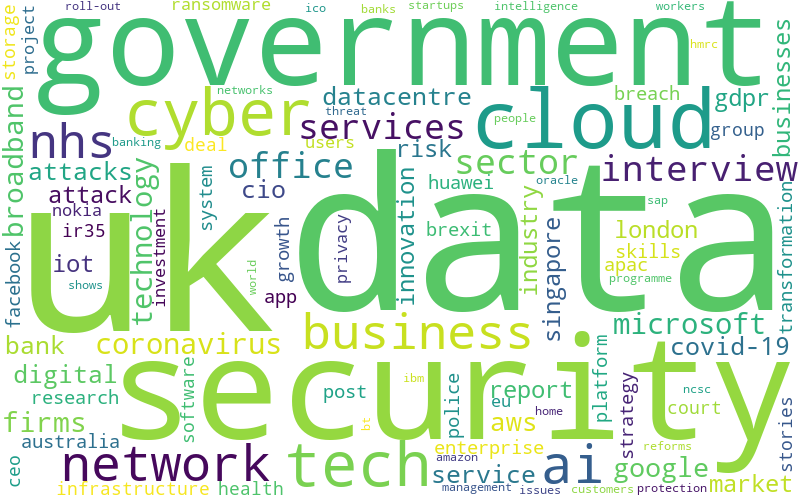

In [21]:
draw_wordcloud(counter_nouns_title, f"{outcome_folder}/week6_wordcloud_nouns.png", 100)

### Popular Adjectives Representing Emotional Aspects

In [22]:
counter_adjs = get_counter(df.tagged_words, global_stopwords+local_stopwords, "JJ")
counter_adjs.most_common(50)

[('digital', 4388),
 ('first', 3435),
 ('public', 3038),
 ('e-guide', 2748),
 ('important', 2743),
 ('next', 2684),
 ('global', 2625),
 ('good', 2561),
 ('top', 2353),
 ('different', 2293),
 ('financial', 2285),
 ('available', 2229),
 ('third', 2185),
 ('last', 2080),
 ('significant', 2005),
 ('possible', 1946),
 ('best', 1940),
 ('strong', 1937),
 ('recent', 1908),
 ('current', 1902),
 ('mobile', 1882),
 ('large', 1874),
 ('artificial', 1866),
 ('past', 1845),
 ('potential', 1829),
 ('chief', 1821),
 ('local', 1821),
 ('major', 1817),
 ('critical', 1797),
 ('latest', 1763),
 ('private', 1759),
 ('high', 1755),
 ('big', 1734),
 ('due', 1731),
 ('operational', 1731),
 ('likely', 1641),
 ('clear', 1636),
 ('cyber', 1620),
 ('small', 1594),
 ('open', 1582),
 ('full', 1565),
 ('personal', 1518),
 ('huge', 1498),
 ('social', 1497),
 ('national', 1494),
 ('senior', 1468),
 ('serious', 1396),
 ('several', 1390),
 ('technical', 1376),
 ('right', 1367)]

형용사들만을 대상으로 한 키워드 분석에서는 IT 분야 사이트의 특성상 digital, mobile, cyber, technical등과 같은 IT 관련 형용사들이 등장함. 

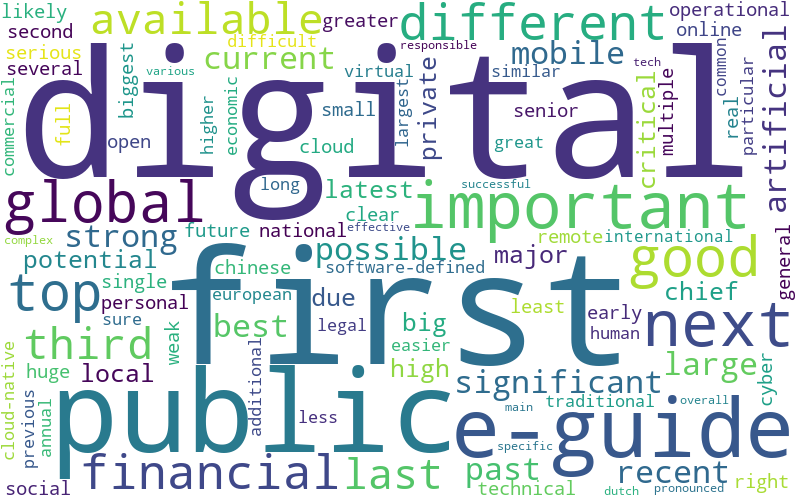

In [23]:
draw_wordcloud(counter_adjs, f"{outcome_folder}/week6_wordcloud_adjs.png", 100)

### Popular Verbs Representing Behavioral Aspects

In [24]:
counter_verbs = get_counter(df.tagged_words, global_stopwords+local_stopwords, "VB")
counter_verbs.most_common(50)

[('need', 4051),
 ('improve', 2828),
 ('ensure', 2790),
 ('support', 2710),
 ('found', 2625),
 ('making', 2482),
 ('become', 2441),
 ('find', 2321),
 ('continue', 2221),
 ('want', 2176),
 ('include', 2135),
 ('build', 2133),
 ('growing', 2075),
 ('reduce', 2046),
 ('taking', 2034),
 ('going', 2026),
 ('create', 2004),
 ('putting', 1985),
 ('looking', 1982),
 ('deliver', 1957),
 ('seen', 1932),
 ('know', 1921),
 ('means', 1892),
 ('go', 1867),
 ('enable', 1864),
 ('come', 1815),
 ('put', 1810),
 ('needed', 1770),
 ('comes', 1768),
 ('keep', 1764),
 ('said.', 1742),
 ('develop', 1736),
 ('look', 1734),
 ('announced', 1732),
 ('run', 1728),
 ('offer', 1721),
 ('existing', 1718),
 ('given', 1656),
 ('told', 1584),
 ('expected', 1566),
 ('understand', 1549),
 ('give', 1536),
 ('reported', 1516),
 ('designed', 1507),
 ('bring', 1500),
 ('think', 1484),
 ('allow', 1478),
 ('providing', 1462),
 ('taken', 1462),
 ('done', 1458)]

동사로 한정지은 키워드 분석에서는 improve, ensure, enable, growing, develop 등과 같은 향상, 발전의 표현들로 여겨지는 키워드들이 눈에 띔.  

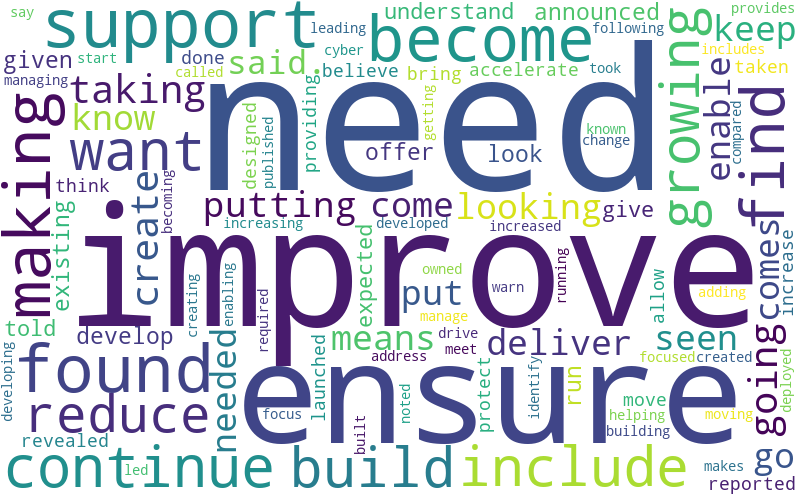

In [25]:
draw_wordcloud(counter_verbs, f"{outcome_folder}/week6_wordcloud_verbs.png", 100)

## Time Series Analysis

In [26]:
df.date.min(), df.date.max()

('2017-09-12 16:15:00', '2021-05-07 10:00:00')

수집된 웹 페이지들이 게재된 기간은 2017년 9월 12일부터 2021년 5월 7일로서 약 4년의 time range를 가짐. 

In [27]:
df.date = df.date.astype('datetime64')

In [28]:
df.date

0      2021-05-07 10:00:00
1      2021-05-07 07:47:00
2      2021-05-07 00:01:00
3      2021-05-06 17:45:00
4      2021-05-06 17:15:00
               ...        
9983   2017-09-13 10:00:00
9984   2017-09-13 09:15:00
9985   2017-09-12 17:00:00
9986   2017-09-12 16:30:00
9987   2017-09-12 16:15:00
Name: date, Length: 9988, dtype: datetime64[ns]

In [29]:
import numpy as np

count = pd.Series(data=1, index=df.date).resample(rule="w").count()
count

date
2017-09-17    39
2017-09-24    49
2017-10-01    12
2017-10-08     0
2017-10-15    40
              ..
2021-04-11    50
2021-04-18    56
2021-04-25    63
2021-05-02    59
2021-05-09    38
Freq: W-SUN, Length: 191, dtype: int64

In [30]:
count.mean(), count.std()

(52.29319371727749, 12.955710212678722)

주별 게재 건수의 평균은 약 52건, 표준편차는 약 12.9건으로서, 매주 평균 52건 정도가 게재되었음. 

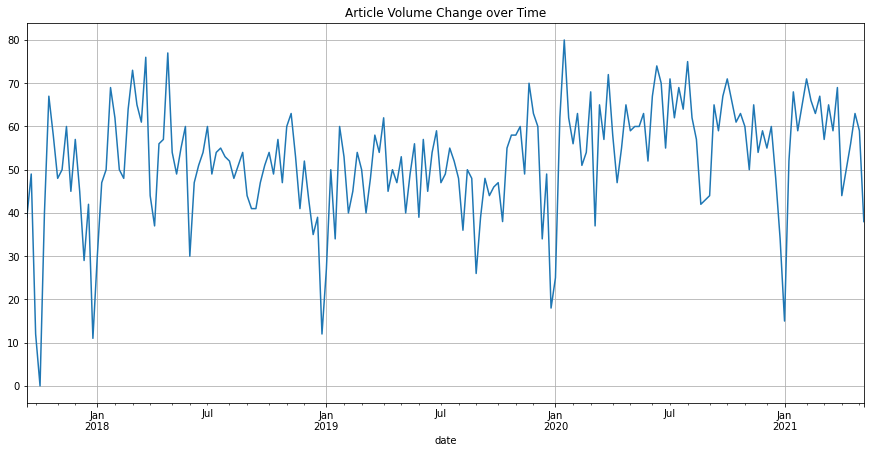

In [31]:
count.plot(kind="line", title="Article Volume Change over Time", figsize=(15,7), grid=True)

### Peak Day Analysis

In [32]:
count.max(), count.idxmax()

(80, Timestamp('2020-01-19 00:00:00', freq='W-SUN'))

가장 많이 게재된 peak week는 2020년 1월 19일 주간으로서, 이 기간 동안 평균 52건을 크게 웃도는 80건의 글이 게재되었음. 영국은 코로나 확진자가 2020년 1월 31일 처음 발생하여 이때는 관련 언급이 전혀 없음. 이 기간동안 주로 다루어진 분야는 전체 기간을 분석했을 때와 비슷하였음. 따라서 이 기간이 기사가 가장 많이 나온 이유를 파악할 수 없었음. 예측하면 service, services의 키워드들이 최상위권을 차지했는데 이 기간동안 글로벌적으로, 기업적으로 서비스적인 Issue(새로운 기술 등장, 기술 및 서비스의 성공 등)가 여럿 발생하였다고 생각함.

In [33]:
df[(df.date >= "2020-1-12") & (df.date < "2020-1-19")][["title", "text"]].sample(20, random_state=0)

,title,text
4032,UK tech sector leads global growth in 2019,"The UK’s technology sector secured one-third of all European tech investments in 2019 to hit a record high of $13.2bn, according to latest industr..."
4009,Lorca announces new cohort of 20 security scaleups,"The London Office for Rapid Cyber Security Advancement (Lorca) has announced the 20 companies that will move forward to join its fourth intake, fo..."
4012,Travelex warns customers to be alert to phone scams,End-user customers of beleaguered foreign currency services provider Travelex – which is still trying to recover from a ransomware attack more tha...
4059,"US, South Korea to drive 5G to reach 1.5 billion users by 2025","A study from Juniper Research is predicting a global 5G bonanza over the next five years as the industry enjoys annual average growth of 150%, ris..."
4027,Asos trials AR tool to give customers idea of fashion fit,Asos is trialling a new tool for its mobile and desktop sites to show customers what particular garments look like on models of different body typ...
4053,SK Telecom gets close to the edge with global MEC task force,"With mobile edge computing (MEC) now a crucial element in the evolution of use cases such as the internet of things, leading South Korean operator..."
4048,Windows 7: Dead or alive?,A survey of 100 US and UK IT professionals conducted by Kollective one month before Microsoft’s deadline found that more than half of businesses (...
4050,Sextortion campaign hits Nest home security cameras,"Organised criminals are playing on growing mainstream awareness of the risks of smart, connected internet of things (IoT) devices in a sextortion ..."
4030,How container applications are shaping storage management,Containers and microservices are increasingly being adopted by companies in the Asia-Pacific region to speed up application development and become...
4051,Samsung boosts US 5G expansion with TeleWorld acquisition,"Samsung Electronics has agreed to buy US network services provider TeleWorld Solutions (TWS), with the aim of helping network operators to acceler..."


In [34]:
counter_peak = get_counter(df[(df.date >= "2020-1-12") & (df.date < "2020-1-19")].tagged_words, global_stopwords+local_stopwords)
counter_peak.most_common(30)

[('technology', 51),
 ('services', 49),
 ('service', 44),
 ('first', 41),
 ('data', 41),
 ('companies', 41),
 ('across', 41),
 ('time', 40),
 ('support', 39),
 ('2019', 38),
 ('access', 38),
 ('uk', 37),
 ('infrastructure', 36),
 ('people', 35),
 ('business', 35),
 ('digital', 35),
 ('company', 35),
 ('2020', 35),
 ('network', 35),
 ('products', 33),
 ('organisations', 33),
 ('need', 33),
 ('top', 32),
 ('continue', 31),
 ('ceo', 30),
 ('security', 30),
 ('users', 30),
 ('risk', 29),
 ('public', 29),
 ('mobile', 28)]

In [35]:
df_peak = df[(df.date >= "2020-1-12") & (df.date < "2020-1-19")].copy()
df_peak[df_peak.text.str.contains('risk')][['title','text']]

,title,text
3982,App developers sue Facebook over ‘anti-competitive conduct’,App developers have filed a lawsuit against Facebook accusing the social media company of “overtly anticompetitive conduct”.The Nordic region migh...
3984,NCSC makes final call for entries to CyberFirst Girls contest,"Entries to the National Cyber Security Centre’s (NCSC’s) CyberFirst Girls 2020 contest are due to close on Tuesday 21 January, with teams of girls..."
3985,Emotet reinvigorated after Christmas break,"The Emotet email trojan-turned-botnet is back in action, apparently reinvigorated after the holiday season, cyber security researchers at Proofpoi..."
3991,CAA debuts aviation cyber security assurance scheme,"The UK’s Civil Aviation Authority (CAA) has launched a scheme, developed in partnership with security certification body Crest, that it hopes will..."
3992,IR35 private sector reforms: Blanket bans ‘devalue’ IT contractor contributions to digital projects,Enterprises risk trivialising the skills and experience of the IT contractors they engage by forcing them onto permanent contracts to ensure compl...
3993,Cops take down data wholesale operation,A website that made available more than 12 billion personal credentials for as little as $2 a day has been taken offline and two arrests made in N...
3994,Cabinet Office launches data handling review,The Cabinet Office has issued a statement around its investigations into the government leak of personal data of several hundred prominent figures...
3995,Davos 2020: Why IT sector must address climate issues,"At the launch of the 15th edition of the World Economic Forum’s (WEF’s) Global risk report, Børge Brende, president of the World Economic Forum, w..."
3998,Australian wildfires take toll on telco networks,"The bushfires that have killed 29 people, destroyed more than 2,200 homes and scorched about 18 million hectares of Australia have also taken thei..."
3999,"UK’s phone and internet bulk data surveillance unlawful, says EU court opinion","British intelligence services’ bulk collection of the population’s telephone, email and web browsing data breaches European law, according to a pr..."


In [36]:
counter_peak_title = get_counter(df[(df.date >= "2020-1-12") & (df.date < "2020-1-19")].title_tagged_words, global_stopwords+local_stopwords)
counter_peak_title.most_common(30)

[('uk', 10),
 ('5g', 8),
 ('data', 6),
 ('global', 6),
 ('security', 5),
 ('windows', 5),
 ('mobile', 4),
 ('digital', 4),
 ('sector', 4),
 ('tech', 4),
 ('7', 4),
 ('services', 3),
 ('office', 3),
 ('business', 3),
 ('launches', 3),
 ('networks', 3),
 ('2019', 3),
 ('billion', 3),
 ('customers', 3),
 ('cloud', 3),
 ('government', 3),
 ('drive', 3),
 ('edge', 3),
 ('developers', 2),
 ('app', 2),
 ('network', 2),
 ('contract', 2),
 ('break', 2),
 ('technology', 2),
 ('huawei', 2)]

여러 키워들 중 risk라는 키워드가 눈에 띄어 어떤 의미를 담고 있는지 궁금하여 자세히 들여다보았음. 주로 보안의 허점에 대해 얘기하는 글들이었는데, 5G/AI/Data Cloud와 같이 새롭게 개발되는 IT 분야에서의 Issue가 인상적이었음. 또한, 영국의 정책 gdpr/IR35 들이 IT 업계에 영향을 끼친 점을 알 수 있었으며 Window 7이 여럿 언급되었는데 조사한 결과 1월 14일에 Window 7의 서비스가 종료되었음. 이는 기사의 제목 키워드 분석을 통해 또한 알 수 있었음.

4년의 기사들을 사용했기 때문에 연도별로 분석을 진행하였음.

In [37]:
counter_2017 = get_counter(df[df.date < "2018-1-1"].tagged_words, global_stopwords+local_stopwords)
counter_2017.most_common(30)

[('data', 404),
 ('technology', 381),
 ('services', 357),
 ('need', 339),
 ('business', 333),
 ('people', 315),
 ('digital', 303),
 ('time', 302),
 ('uk', 298),
 ('service', 291),
 ('across', 280),
 ('organisations', 278),
 ('companies', 258),
 ('systems', 257),
 ('security', 255),
 ('2017', 254),
 ('company', 250),
 ('support', 237),
 ('first', 235),
 ('information', 235),
 ('access', 233),
 ('government', 231),
 ('customers', 226),
 ('businesses', 221),
 ('industry', 219),
 ('public', 217),
 ('world', 211),
 ('computer', 202),
 ('organisation', 201),
 ('infrastructure', 201)]

In [38]:
counter_2018 = get_counter(df[(df.date >= "2017-12-31") & (df.date < "2019-1-1")].tagged_words, global_stopwords+local_stopwords)
counter_2018.most_common(30)

[('data', 1766),
 ('technology', 1601),
 ('services', 1480),
 ('need', 1443),
 ('business', 1420),
 ('uk', 1369),
 ('across', 1286),
 ('digital', 1278),
 ('time', 1230),
 ('people', 1224),
 ('first', 1162),
 ('service', 1137),
 ('organisations', 1125),
 ('companies', 1112),
 ('security', 1082),
 ('company', 1051),
 ('systems', 1035),
 ('information', 1032),
 ('access', 1024),
 ('support', 985),
 ('2018', 967),
 ('government', 931),
 ('customers', 920),
 ('industry', 916),
 ('infrastructure', 901),
 ('sector', 893),
 ('public', 879),
 ('businesses', 871),
 ('2017', 867),
 ('future', 854)]

In [39]:
counter_2019 = get_counter(df[(df.date >= "2018-12-31") & (df.date < "2020-1-1")].tagged_words, global_stopwords+local_stopwords)
counter_2019.most_common(30)

[('data', 1583),
 ('technology', 1520),
 ('services', 1471),
 ('business', 1303),
 ('need', 1236),
 ('time', 1207),
 ('digital', 1205),
 ('across', 1151),
 ('uk', 1109),
 ('service', 1094),
 ('people', 1078),
 ('first', 1064),
 ('companies', 1041),
 ('company', 1020),
 ('security', 1018),
 ('organisations', 995),
 ('support', 955),
 ('access', 934),
 ('2019', 912),
 ('government', 908),
 ('infrastructure', 895),
 ('customers', 883),
 ('systems', 871),
 ('public', 868),
 ('information', 847),
 ('industry', 819),
 ('network', 795),
 ('2018', 779),
 ('cloud', 773),
 ('businesses', 768)]

In [40]:
counter_2020 = get_counter(df[(df.date >= "2019-12-31") & (df.date < "2021-1-1")].tagged_words, global_stopwords+local_stopwords)
counter_2020.most_common(30)

[('services', 1892),
 ('data', 1862),
 ('technology', 1787),
 ('companies', 1612),
 ('business', 1604),
 ('across', 1575),
 ('time', 1563),
 ('service', 1543),
 ('digital', 1510),
 ('people', 1492),
 ('need', 1474),
 ('support', 1418),
 ('uk', 1402),
 ('government', 1399),
 ('access', 1359),
 ('security', 1343),
 ('first', 1343),
 ('2020', 1298),
 ('infrastructure', 1283),
 ('users', 1224),
 ('company', 1214),
 ('covid-19', 1211),
 ('organisations', 1180),
 ('public', 1152),
 ('e-guide', 1129),
 ('risk', 1109),
 ('top', 1081),
 ('improve', 1068),
 ('putting', 1068),
 ('information', 1064)]

In [41]:
counter_2021 = get_counter(df[(df.date >= "2020-12-31") & (df.date < "2021-5-8")].tagged_words, global_stopwords+local_stopwords)
counter_2021.most_common(30)

[('services', 699),
 ('data', 657),
 ('across', 606),
 ('technology', 603),
 ('digital', 572),
 ('service', 545),
 ('time', 545),
 ('business', 543),
 ('companies', 538),
 ('2020', 526),
 ('people', 507),
 ('support', 490),
 ('access', 484),
 ('first', 481),
 ('need', 479),
 ('uk', 473),
 ('company', 463),
 ('infrastructure', 459),
 ('security', 455),
 ('government', 446),
 ('improve', 412),
 ('e-guide', 410),
 ('organisations', 403),
 ('pandemic', 399),
 ('users', 394),
 ('customers', 393),
 ('public', 391),
 ('2021', 390),
 ('products', 389),
 ('network', 382)]

'data'라는 키워드는 매년 최상위권에 해당됨. 영국의 경우, 20년 말부터 21년도 초기에 코로나 확진자 수가 급격하게 증가했기 때문에 covid-19, pandemic이라는 단어를 확인할 수 있었음.

## Document Clustering

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words=global_stopwords+local_stopwords, max_df=0.7)
X = vectorizer.fit_transform(df.text)

In [43]:
X.shape

(9988, 67508)

There are 9,988 documents and 67,508 words, or features. 

### K-Means Clustering

### Step 1. Choose the number of clusters

In [44]:
k = 5

### Step 2. Initialize a model object for k-means clustering

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Step 3. Fit the model using the input data

In [46]:
%time kmeans.fit(X)

CPU times: user 12min 3s, sys: 36.9 s, total: 12min 40s
Wall time: 11min 59s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Step 4. Examine the clustering outcome

The focus of this step should be on identifying the characteristics of each cluster. 

In [47]:
kmeans.labels_

array([2, 3, 2, ..., 1, 0, 3], dtype=int32)

In [48]:
df["cluster"] = kmeans.labels_

In [49]:
df[["title", "text", "cluster"]]

,title,text,cluster
0,"Ericsson, Telarus team to take 5G-ready virtual workspace to small businesses",Ericsson has launched a 5G-ready virtual workspace service designed to address the future needs of small and medium-sized enterprises (SMEs).Thoug...,2
1,"Ransomware, supply chain attacks show no sign of abating",Ransomware and supply chain attacks will continue to rear their ugly head in a world where cyber attacks are increasingly being politicised.Nearly...,3
2,Government urged to add scam protections to Online Safety Bill,"A coalition of organisations representing consumers, civil society and business is urging the government to include protections from online cyber ...",2
3,Tech startups turn to digital PR platform for media exposure,Early-stage technology startups in the UK are using digital public relations (PR) platform Newspage to help increase media visibility and secure f...,2
4,Nokia unveils Smart Node for premium 5G mobile indoor coverage,"With the new world of work blurring the borders between the office and home environment, and use cases and applications evolving accordingly, Noki...",4
...,...,...,...
9983,Vodafone whitepaper hails role of IoT in delivering personalised healthcare treatments,"Internet of things (IoT) devices could provide patients suffering with long-term illnesses with access to more personalised treatment, a Vodafone ...",2
9984,CBI calls for transitional deal with EU on data,The Confederation of British Industry (CBI) has said there must be an agreement on the exchange of data between the European Union (EU) and the UK...,2
9985,Businesses that overlook ROI analysis are missing cost savings,"Businesses are turning to cloud computing projects expecting cost savings, but many that don’t carry outreturn on investment (ROI) analysis are mi...",1
9986,Openreach and rivals want collaborative approach to broadband,"The government’s new-found love for full fibre-to-the-premises(FTTP) broadband infrastructure is most welcome, but its targets for roll-out are am...",0


In [50]:
count2 = df.cluster.value_counts()
count2

2    5587
3    1842
1    1639
4     570
0     350
Name: cluster, dtype: int64

전체 문서들에 대해 다양한 개수의 클러스터를 찾아본 결과 5개의 클러스터를 찾았을 때 가장 큰 클러스터가 기사들의 절반을 차지함  

In [51]:
df[df.cluster == count2.index[0]].sample(10, random_state=0)[["title", "text", "cluster"]]     # the largest cluster

,title,text,cluster
1572,Tech Talent Charter launches Doing It Anyway role model campaign,Tech Talent Charter (TTC) has launched a campaign describing women’s various journeys into tech to encourage others to pursue a career in the indu...,2
9825,SAP Hybris paints the future of commerce,"When SAP Hybris’ co-founder and president Carsten Thoma was planning for his new house in Brooklyn about two years ago, he turned to Pinterest for...",2
7234,"London tech startups awarded £15,000 as part of Mayor's 'smart city' initiative","Eight tech startups have been awarded £15,000 each to help develop innovative technologies to combat some of London’s most pressing social and env...",2
2367,"Post-Privacy Shield, what chance for a Brexit data adequacy deal?",The 16 July 2020 ruling from the European Court of Justice (ECJ) that Privacy Shield – the legal mechanism that enables hundreds of thousands of U...,2
7381,UK tech industry warns government over post-Brexit immigration,UK tech bodies are calling on government to ensure the post-Brexit immigration policy is open to tech talent from the EU as it currently is.We tak...,2
9750,"Oversight of intelligence agencies’ data sharing has ‘failed’, court hears","The UK has failed to minimise the impact of intrusive gathering and sharing of highly sensitive data by the intelligence services, Britain’s most ...",2
4086,CES 2020: IBM grows Q network collaborators,"During a presentation at CES in Las Vegas, Dario Gil, director of IBM Research, urged developers to start thinking about how to use quantum compu...",2
432,Parliamentary PACA Committee slams Gove over Covid-19 data failures,The Parliamentary Public Administration and Constitutional Affairs Committee (PACA) has issued a report that is highly critical of the government’...,2
1139,Competition and Markets Authority kicks off Nvidia/Arm investigation,The Competition and Markets Authority (CMA) has started the process to begin a formal investigation of Nvidia’s proposed £31bn merger with UK chip...,2
1881,"CIO interview: Mark Holt, CTO, Trainline",Trainline chief technology officer Mark Holt hasn’t let the coronavirus pandemic derail his plans to push data-led insight to rail and coach passe...,2


In [52]:
counter_max = get_counter(df[df.cluster == count2.index[0]].tagged_words, global_stopwords+local_stopwords)
counter_max.most_common(30)

[('technology', 3645),
 ('data', 3397),
 ('people', 3174),
 ('digital', 3149),
 ('services', 3008),
 ('business', 2920),
 ('uk', 2916),
 ('need', 2869),
 ('time', 2817),
 ('across', 2735),
 ('government', 2642),
 ('companies', 2469),
 ('service', 2362),
 ('first', 2328),
 ('support', 2318),
 ('company', 2122),
 ('information', 2067),
 ('organisations', 2033),
 ('access', 1980),
 ('sector', 1957),
 ('public', 1887),
 ('system', 1849),
 ('systems', 1814),
 ('future', 1797),
 ('world', 1765),
 ('good', 1756),
 ('e-guide', 1725),
 ('businesses', 1716),
 ('industry', 1693),
 ('research', 1685)]

가장 큰 클러스터는 데이터, 기술, 정부, 회사 등 특정 IT 기술 보다는 그 외의 비즈니스적인 요소를 담고있음.

In [53]:
df[df.cluster == count2.index[1]].sample(10, random_state=0)[["title", "text", "cluster"]]     # the second largest cluster

,title,text,cluster
8860,Imaging systems biggest security risk in healthcare,"Although infusion pumps are the most widely deployed connected medical devices, they are not the leading cause of security issues, a study of medi...",3
329,Four in five UK businesses seek new security suppliers,About 80% of UK businesses are currently seeking new suppliers in the cyber security technology space as investment in security remains healthy du...,3
9621,Nordic states deepen cyber defence collaboration,Nordic collaboration is about to undergo a serious and redefining makeover. This shift in direction is substantially due to the perceived threat p...,3
5909,Nearly a quarter of tech firms do not security check products,"Application security is not a priority for suppliers, with 23% of IT security professionals polled admitting their organisations do not carry out ...",3
2031,Coronavirus: Thousands of ISO certifications set to lapse,Thousands of ISO management system certifications are at risk of lapsing over the next few months as certification bodies struggle to overcome a b...,3
9205,Powerful Zyklon malware exploiting MS Office flaws,Businesses are being urged to ensure Microsoft Office patches are up to date as known vulnerabilities are being used to spread the powerful Zyklon...,3
7529,Online crime costs more than $1m a minute,"Every 60 seconds, close to $1.14m is lost to cyber crime, and 1,861 people fall victim, according to a report by threat management firm RiskIQ.In ...",3
9550,Ransomware rages on with no signs of abating,"The tidal wave of ransomware attacks this year has ruthlessly cast the spotlight on gaps and lapses in cyber security, crippling some organisation...",3
9640,Malaysia partners Huawei in cyber security,The Malaysian government will work with Chinese technology giant Huawei to deepen its capabilities in combatting cyber threats that have been plag...,3
3584,Bill Gates backs Crest fintech security scheme for Africa and Asia,Cyber security accreditation and certification non-profit Crest has been awarded a grant of $1.4m (£1m/€1.2m) by the Bill and Melinda Gates Founda...,3


In [54]:
counter_max = get_counter(df[df.cluster == count2.index[1]].tagged_words, global_stopwords+local_stopwords)
counter_max.most_common(30)

[('security', 1826),
 ('cyber', 1694),
 ('data', 1415),
 ('risk', 1273),
 ('companies', 1247),
 ('organisations', 1208),
 ('top', 1200),
 ('attacks', 1198),
 ('attack', 1192),
 ('information', 1091),
 ('users', 1067),
 ('threat', 1022),
 ('researchers', 1010),
 ('systems', 993),
 ('countries', 985),
 ('third', 966),
 ('privacy', 936),
 ('potentially', 933),
 ('need', 926),
 ('access', 893),
 ('time', 875),
 ('putting', 868),
 ('first', 858),
 ('uk', 846),
 ('services', 840),
 ('weak', 836),
 ('laws', 833),
 ('owners', 824),
 ('chinese', 802),
 ('warn', 801)]

두번째로 큰 클러스터는 보안(IT 기술)에 대한 내용이 주를 이룸. 

In [55]:
df[df.cluster == count2.index[-1]].sample(10, random_state=0)[["title", "text", "cluster"]]     # the smallest cluster 

,title,text,cluster
99,Triangle shapes up to expand gigabit broadband services,"Ramping up its already heady pace of full-fibre broadband roll-out across the UK, CityFibre has now expanded its long-established partnership with...",0
990,New contractors appointed to roll out fibre broadband across Devon and Somerset,"Undeterred by criticism from a parliamentary committee inquiry for the unrealistic nature of its gigabit broadband roll-out targets, the UK govern...",0
7648,Advertised broadband speeds dropping across UK,"BT, EE, John Lewis Broadband, Plusnet, the Post Office, Sky, TalkTalk, Utility Warehouse and Zen Internet are among the major internet service pro...",0
854,"O2, Three, Vodafone team to enhance rural mobile coverage","In the first stage of the UK government’s Shared Rural Network (SRN) programme, which aims to support the deployment of 5G and extend 4G mobile co...",0
8298,Vodafone becomes largest next-gen broadband player in Europe,"Communications services provider (CSP) Vodafone has acquired the Czech, German, Hungarian and Romanian operations of Virgin Media parent, American...",0
5199,Virgin Media pledges gigabit broadband without full-fibre,Internet service provider (ISP) and cable TV operator Virgin Media has announced a plan to bring ultrafast 1Gbps broadband services within reach o...,0
5237,Openreach to slash wholesale fibre prices from September,National network builder Openreach is to cut wholesale prices across its range of ultrafast full-fibre – or fibre-to-the-premises (FTTP) – broadba...,0
3068,UK comms market set for shake-up as O2 and Virgin Media confirm merger,"In a potentially seismic shift for the UK telecoms industry, Liberty Global and Telefónica have revealed that their respective UK subsidiaries, ca...",0
1939,Openreach adds 67 locations to broadband fibre build plan,"As part of a new tranche of build work that will begin in March 2021, BT-owned UK national infrastructure provider Openreach has announced a furth...",0
7032,Hyperoptic full-fibre network hits public housing milestone,"Full-fibre broadband network builder and service provider Hyperoptic has now passed 160,000 social and community housing properties around the UK ...",0


In [56]:
counter_min = get_counter(df[df.cluster == count2.index[-1]].tagged_words, global_stopwords+local_stopwords)
counter_min.most_common(30)

[('broadband', 335),
 ('services', 316),
 ('uk', 308),
 ('service', 298),
 ('infrastructure', 283),
 ('network', 283),
 ('access', 248),
 ('digital', 246),
 ('across', 239),
 ('fibre', 235),
 ('full-fibre', 231),
 ('businesses', 207),
 ('connectivity', 206),
 ('delivery', 204),
 ('government', 203),
 ('improve', 202),
 ('homes', 201),
 ('products', 191),
 ('costs', 189),
 ('networks', 188),
 ('roll-out', 181),
 ('people', 180),
 ('business', 178),
 ('accelerate', 176),
 ('interest', 175),
 ('first', 175),
 ('equipment', 172),
 ('need', 172),
 ('investment', 171),
 ('customers', 170)]

가장 작은 클러스터는 네트워크(IT 기술)에 대한 내용임. 

## Topic Modeling

### Step 1. Choose the number of topics

In [4]:
num_topics = 2

### Step 2. Initialize a model object for LDA topic modeling

In [5]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=num_topics, random_state=0)     # LDA uses randomness to get a probability distribution
lda

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

sklearn.decomposition.LatentDirichletAllocation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

### Step 3. Fit the model using the input data

In [16]:
%time lda.fit(X)

CPU times: user 37.3 s, sys: 172 ms, total: 37.4 s
Wall time: 37.3 s


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

### Step 4. Examine the output of topic modeling

In [7]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("*** Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [17]:
show_topics(lda, vectorizer.get_feature_names(), 10)

*** Topic 0:
366.36 * data + 319.43 * security + 280.95 * cloud + 263.33 * cyber + 254.45 * uk + 242.43 * digital + 222.19 * government + 209.69 * technology + 207.55 * services + 180.56 * business

*** Topic 1:
101.46 * 5g + 82.55 * broadband + 76.11 * fibre + 33.82 * ir35 + 32.53 * openreach + 31.24 * hmrc + 26.66 * 4g + 26.05 * gigabit + 25.74 * ofcom + 23.85 * spectrum



### Topic Model Visualization

In [3]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


pyLDAvis: https://github.com/bmabey/pyLDAvis

In [18]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer)

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.104154  0.0       1        1  94.627675
1     -0.104154  0.0       2        1   5.372325, topic_info=              Term       Freq      Total Category  logprob  loglift
2777            5g  99.000000  99.000000  Default  30.0000  30.0000
11167    broadband  20.000000  20.000000  Default  29.0000  29.0000
24237        fibre  16.000000  16.000000  Default  28.0000  28.0000
29494         hmrc  16.000000  16.000000  Default  27.0000  27.0000
15772  contractors  17.000000  17.000000  Default  26.0000  26.0000
...            ...        ...        ...      ...      ...      ...
41809        nokia   2.449260  18.287805   Topic2  -7.7823   0.9135
64720     vodafone   2.364408  19.032123   Topic2  -7.8175   0.8383
46864     premises   1.701632  10.364855   Topic2  -8.1465   1.1171
11325           bt   2.043249  26.544044   Topic2  -7.9635   0.3596
29666        homes   1.507344  15.310859   Topic2  -8.2677   0.6057

[115 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
294        1  0.856824     10mbps
294        2  0.856824     10mbps
2427       1  0.452990         4g
2427       2  0.452990         4g
2777       1  0.828081         5g
...      ...       ...        ...
62545      2  0.794081  ultrafast
63707      1  0.777004        uso
63707      2  0.777004        uso
64720      1  0.893227   vodafone
64720      2  0.105085   vodafone

[141 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

다양한 개수의 토픽들을 시도해본 결과 토픽수가 2개일 때 overlap 되는 토픽들 없이 찾을 수 있었음. 데이터/보안/비즈니스적인 내용들이 종합적으로 존재하여 이들의 토픽을 분리할 수 없었음. 나머지 하나의 토픽은 네트워크(5g, 브로드밴드, 4g, 기가비트, 영국의 통신회사: Openreach)이었음.